In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [318]:
sales= pd.read_csv('home_data.csv')
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Exploring the data for housing sales

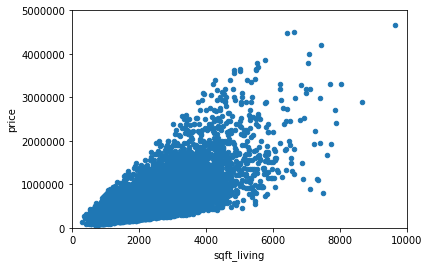

In [31]:
sales.plot(kind='scatter', x='sqft_living', y='price', xlim=(0, 10000), ylim=(0,5000000))

## Splitting train and test

In [330]:
train, test = train_test_split(sales, test_size=0.2)
#len(train)
#len(test)

## Build the regression model 

In [237]:
from sklearn.linear_model import LinearRegression
x = np.array(train['sqft_living'])
y = np.array(train['price'])
regr = LinearRegression()
#len(y)

In [238]:
x=x.reshape(-1,1)
#len(x)

In [246]:
regr.fit(x,y)
regr.coef_
regr.intercept_

-53332.76270405261

##  Evaluating simple model


In [240]:
print (test['price'].mean())

536534.6465417534


In [241]:
x_test = np.array(test['sqft_living'])
y_test = np.array(test['price'])
x_test = x_test.reshape(-1,1)

#len(x_test)


In [242]:
y_pred = regr.predict(x_test)
y_pred

array([ 331887.75452334,  314766.84264657,  166385.6063812 , ...,
        291938.96014421,  260550.62170346, 1073793.93585018])

## Mean Square error and RMSE

In [210]:
sum(y_test-y_pred)


5701621.142514763

In [244]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

247787.5041590463

## Visualization

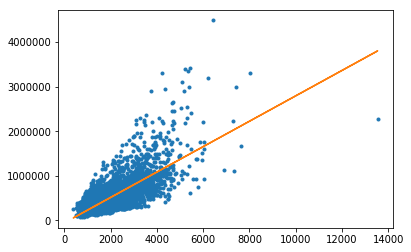

In [221]:
plt.plot(test['sqft_living'], test['price'], '.',
        test['sqft_living'], y_pred, '-')

In [232]:
import statsmodels.api as sm
result = sm.OLS(y, x).fit()
print(result.params)


[263.66134679]


## Exploring features

In [320]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [327]:
features= sales[my_features]

In [324]:
features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


In [325]:
price = sales['price']
zipcode = sales['zipcode']
#price

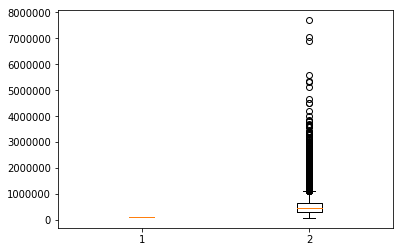

In [286]:
data_to_plot = (zipcode, price)
#data_to_plot

bp = plt.boxplot(data_to_plot)

## Build regression with more features

In [329]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(features, price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Validating model with features

In [332]:
features_test= test[my_features]
features_train= train[my_features]
y_test = np.array(test['price'])
y_train = np.array(train['price'])

In [344]:
test_fit = model.fit(features_test, y_test)
train_fit = model.fit(features_train, y_train)

In [346]:
test_fit.coef_
test_fit.intercept_

-52020888.29893939

In [347]:
y_pred_test = test_fit.predict(features_test)
y_pred_test

y_pred_train = train_fit.predict(features_train)
y_pred_train

array([218754.03428657, 824923.65802985, 328910.80861917, ...,
       764059.41468047, 180254.10438665, 977039.35115313])

In [348]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred_test))
rms

263862.84312787984

In [350]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_pred_train))
rms

253584.06793672915